# Plots of loss and accuracy over training

In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_results(results_fn):
    """
        Function to load the results
            - result_fn: the path to the result folder
    """
    results_dir = '../results/'
    results_path = os.path.join(results_dir,results_fn)
    
    with open(results_path, 'rb') as f:
        data = pickle.load(f)
        
    results = data['results']
    losses = np.array([r['train_losses'] for r in results]).T
    train_accs = []
    test_accs = []
    analyze_accs = []
    for run in results:
        train_accs.append([s['acc'] for s in run['train_accs']])
        test_accs.append([s['acc'] for s in run['test_accs']])
        analyze_accs.append([s['acc'] for s in run['analyze_accs']])
    train_accs = np.array(train_accs)
    test_accs = np.array(test_accs)
    analyze_accs = np.array(analyze_accs)
    return losses, train_accs, test_accs, analyze_accs

In [3]:
def plot_losses(losses):
    """
        Funciton to plot the loss values 
            losses: loss values 
    """
    plt.plot(losses)
    plt.title("Training curve of each run")
    plt.ylabel("Loss")
    plt.xlabel("Steps")
    plt.show()

In [4]:
def plot_accuracy(train_accs, test_accs, analyze_accs):
    """
        Function to plot the accuracies
            - train_accs: accuracies during the training 
            - test_accs: accuracies during the test 
            - analyze_accs: accuracies during the analysis
    """
    n_runs, n_checkpoints = train_accs.shape

    # Compute mean and standard deviation for error bars
    train_mean = np.mean(train_accs, axis=0)
    test_mean = np.mean(test_accs, axis=0)
    analyze_mean = np.mean(analyze_accs, axis=0)

    train_sd = np.std(train_accs, axis=0)
    test_sd = np.std(test_accs, axis=0)
    analyze_sd = np.std(analyze_accs, axis=0)
    
    # Plot
    fig, ax = plt.subplots()
    x = np.arange(n_checkpoints)*analyze_every
    ax.errorbar(x, train_mean, yerr=train_sd, c='tab:blue')
    ax.errorbar(x, test_mean, yerr=test_sd, c='tab:green')
    ax.errorbar(x, analyze_mean, yerr=analyze_sd, c='tab:purple')
    plt.ylim([0.45, 1.05])
    plt.xlabel('Steps')
    plt.ylabel('Accuracy')
    ax.legend(["Train", "Test", "Analyze"])
    plt.show()

In [5]:
results_fn = 'rnn.P'
# steps at each we do the analysis (e.g, do the analysis every 50 steps)
analyze_every = 50 

Loading the results

In [6]:
losses, train_accs, test_accs, analyze_accs = load_results(results_fn)

Plotting the loss values over training steps 
- Each color shows one different run (total 20 runs)

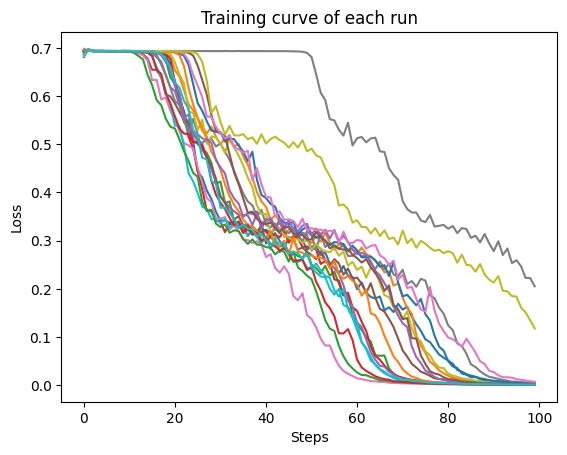

In [7]:
plot_losses(losses)

Plot the accuacy function during training, test, and analysis
- All the accuracies get to 100%

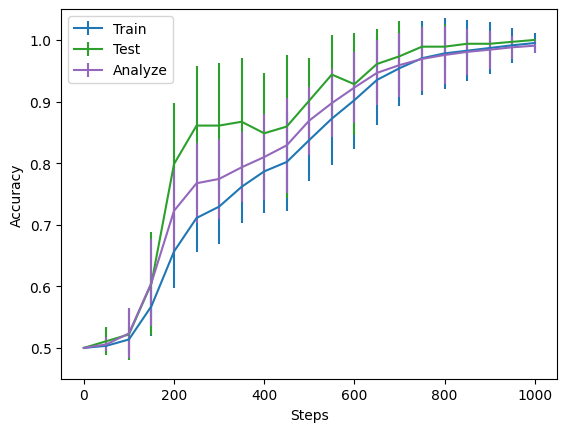

In [8]:
plot_accuracy(train_accs, test_accs, analyze_accs)